In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Jacobi Iteration

In [2]:
def norminf(A):             #The inf-norm for matrices
    return np.max(abs(A))

def Jacobi_iter(A,b,x0,Nmax,tol):        #Input a matrix A, a column vector b, an initial guess vector x0,
                                         #the max number of iterations Nmax, and tolerance tol
    n = np.size(A,0)
    D = np.diag(np.diag(A))
    Bj = np.eye(n) - (np.linalg.inv(D)@A)
    f = np.linalg.inv(D)@b.T
    
    k = 0
    xk = x0.T
    Error_kth = []
    while (k<Nmax):
        xk = Bj@xk + f
        rk = b.T - (A@xk)
        Error_kth.append(norminf(rk))
        if norminf(rk) < tol:
            return xk,Error_kth,k+1
        else:
            k += 1
    return xk,Error_kth,k+1


# Jacobi Over Relaxation Iteration

In [3]:
def Jacobi_Over_Re_iter(A,b,x0,w,Nmax,tol):       #Input a matrix A, a column vector b, an initial guess vector x0,
                                                  #weight w, max number of iterations Nmax, and tolerance tol
    n = np.size(A,0)
    D = np.diag(np.diag(A))
    Bj = np.eye(n) - (np.linalg.inv(D)@A)
    Bjor = ((w*Bj) + ((1-w)*np.eye(n)))
    f = np.linalg.inv(D)@b.T
    
    k = 0
    xk = x0.T

    Error_kth = []
    
    while (k<Nmax):
        xk = Bjor@xk + (w*f)
        rk = b.T - (A@xk)
        Error_kth.append(norminf(rk))
        
        if norminf(rk) < tol:
            return xk,Error_kth,k+1
        else:
            k += 1
    return xk,Error_kth,k+1


# Gauss-Seidel Iteration

In [4]:
def LDU(A):                    #Turns square matrix A into A = L + D + U where L=lower tri, D=diagonal, and
                               #U=upper tri
    D = np.diag(np.diag(A))
    L = np.tril(A) - D
    U = np.triu(A) - D
    return D,L,U

 
def GS_iter(A,b,x0,Nmax,tol):        #Input a matrix A, a column vector b, an initial guess vector x0,
                                     #max number of iterations Nmax, and tolerance tol
    D,L,U = LDU(A)
    f = np.linalg.inv(D+L)@b.T
    Bgs = -np.linalg.inv(D+L)@U
    
    k = 0
    xk = x0.T

    Error_kth = []
    
    while (k<Nmax):
        xk = Bgs@xk + f
        rk = b.T - (A@xk)
        Error_kth.append(norminf(rk))
        if norminf(rk) < tol:
            return xk,Error_kth,k+1
        else:
            k += 1
    return xk,Error_kth,k+1



# SOR Iteration

In [5]:
def SOR_iter(A,b,x0,w,Nmax,tol):                #Input a matrix A, a column vector b, an initial guess vector x0,
                                                #weight w, max number of iterations Nmax, and tolerance tol
    D,L,U = LDU(A)
    f = (np.linalg.inv((D+(w*L))))@b.T
    Bsor = (np.linalg.inv((D+(w*L))))@(((1-w)*D) - (w*U))
    
    k = 0
    xk = x0.T

    Error_kth = []
    
    while (k<Nmax):
        xk = Bsor@xk + (w*f)
        rk = b.T - (A@xk)
        Error_kth.append(norminf(rk))
        if norminf(rk) < tol:
            return xk,Error_kth,k+1
        else:
            k += 1
    return xk,Error_kth,k+1


# Analysis of the Iterators

In [9]:
#Test Matrices
Gen = np.arange(1,10).reshape(3,3)           #General matrix
Tri = np.array([[1,2,0],[1,2,3],[0,1,2]])    #Tridiagonal matrix
DD = np.array([[3,-2,1],[1,-3,2],[-1,2,4]])  #Diagonally dominant matrix
PD = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]]) #Positive definite matrix
Sym = np.array([[3,4,5],[4,7,8],[5,8,2]])    #Symmetric matrix

#Test vector b and initial guess vector x0
b = np.array([[-2,13,7]])
x0 = np.array([[0,0,0]])


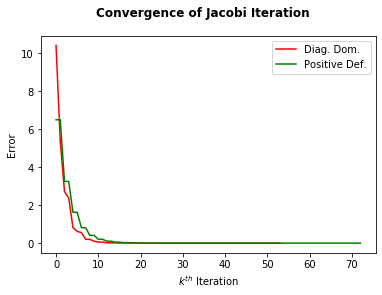

In [10]:
#Jacobi Iteration

xkd_j,ekd_j,kd_j = Jacobi_iter(DD,b,x0,Nmax=1000,tol=10**-10)
xkpd_j,ekpd_j,kpd_j = Jacobi_iter(PD,b,x0,Nmax=1000,tol=10**-10)

# xkg_j,ekg_j,kg_j = Jacobi_iter(Gen,b,x0,Nmax=1000,tol=10**-10)
# xkt_j,ekt_j,kt_j = Jacobi_iter(Tri,b,x0,Nmax=1000,tol=10**-10)
# xks_j,eks_j,ks_j = Jacobi_iter(Sym,b,x0,Nmax=1000,tol=10**-10)


plt.plot(np.arange(kd_j),ekd_j,'r',label='Diag. Dom.')
plt.plot(np.arange(kpd_j),ekpd_j,'g',label='Positive Def.')
# ax2.plot(np.arange(kg_j-1),ekg_j,label='Gen.')
# ax2.plot(np.arange(kt_j-1),ekt_j,label='Tri.')
# ax2.plot(np.arange(ks_j-1),eks_j,label='Sym.')

plt.suptitle('Convergence of Jacobi Iteration',fontsize=12,fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Error')
plt.xlabel('$k^{th}$ Iteration')
plt.show()

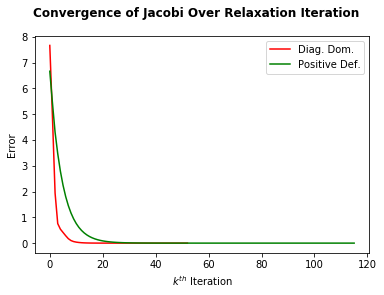

In [11]:
#Jacobi Over Relaxation Iteration

xkd_jo,ekd_jo,kd_jo = Jacobi_Over_Re_iter(DD,b,x0,w=2/3,Nmax=1000,tol=10**-10)
xkpd_jo,ekpd_jo,kpd_jo = Jacobi_Over_Re_iter(PD,b,x0,w=2/3,Nmax=1000,tol=10**-10)

plt.plot(np.arange(kd_jo),ekd_jo,'r',label='Diag. Dom.')
plt.plot(np.arange(kpd_jo),ekpd_jo,'g',label='Positive Def.')

plt.suptitle('Convergence of Jacobi Over Relaxation Iteration',fontsize=12,fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Error')
plt.xlabel('$k^{th}$ Iteration')
plt.show()

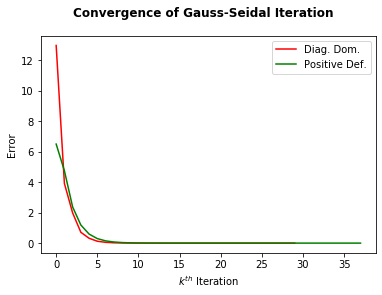

In [12]:
#Gauss-Seidel Iteration

xkd_gs,ekd_gs,kd_gs = GS_iter(DD,b,x0,Nmax=1000,tol=10**-10)
xkpd_gs,ekpd_gs,kpd_gs = GS_iter(PD,b,x0,Nmax=1000,tol=10**-10)

plt.plot(np.arange(kd_gs),ekd_gs,'r',label='Diag. Dom.')
plt.plot(np.arange(kpd_gs),ekpd_gs,'g',label='Positive Def.')

plt.suptitle('Convergence of Gauss-Seidal Iteration',fontsize=12,fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Error')
plt.xlabel('$k^{th}$ Iteration')
plt.show()

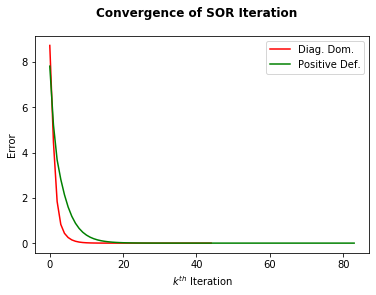

In [14]:
#SOR Iteration 

xkdd_sor,ekdd_sor,kdd_sor = SOR_iter(DD,b,x0,w=2/3,Nmax=1000,tol=10**-10)
xkpd_sor,ekpd_sor,kpd_sor = SOR_iter(PD,b,x0,w=2/3,Nmax=1000,tol=10**-10)

plt.plot(np.arange(kdd_sor),ekdd_sor,'r',label='Diag. Dom.')
plt.plot(np.arange(kpd_sor),ekpd_sor,'g',label='Positive Def.')

plt.suptitle('Convergence of SOR Iteration',fontsize=12,fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Error')
plt.xlabel('$k^{th}$ Iteration')
plt.show()